<a href="https://colab.research.google.com/github/katewall/medium_tutorials/blob/main/Medium_210219Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Square Pie Charts with Squarify

## Kate Wall
## Last Edit: Feb. 18, 2022
## How to easily make a Square Pie Charts from pandas DataFrames


In [1]:
!pip install squarify

import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import rand
import matplotlib.pyplot as plt
import matplotlib as mpl
import squarify  
import random

# Setup

In [2]:
groupA = ['person1','person2','person3','person4','person5','person6','person7']
groupB = ['person1','person2','person3',                                        'person8','person9']
groupC = ['person1','person2',          'person4',                                        'person9','person10']

df = pd.concat([pd.Series(groupA), pd.Series(groupB), pd.Series(groupC)], ignore_index=True, axis=1)
map_dict = {0:'A', 1: 'B', 2: 'C'}
df.rename(columns=map_dict, inplace=True)
df

,A,B,C
0,person1,person1,person1
1,person2,person2,person2
2,person3,person3,person4
3,person4,person8,person9
4,person5,person9,person10
5,person6,NaN,NaN
6,person7,NaN,NaN


In [3]:
df_melt = pd.melt(df)
df_melt = df_melt[np.invert(df_melt.value.isna())]
df_melt

,variable,value
0,A,person1
1,A,person2
2,A,person3
3,A,person4
4,A,person5
5,A,person6
6,A,person7
7,B,person1
8,B,person2
9,B,person3


In [4]:
grouped_multiple_memberships_allowed = df_melt.groupby(['variable']).count()
grouped_multiple_memberships_allowed

,value
variable,
A,7
B,5
C,5


In [5]:
names = grouped_multiple_memberships_allowed.index.to_list()
counts = grouped_multiple_memberships_allowed.value.to_list()
names_with_counts = [names[i]+' ('+str(counts[i])+')' for i in range(len(names))]
prep_df = pd.DataFrame({'count':counts,
                        'labels':names_with_counts})
print('Counts: ' + str(counts))
print('Labels: ' + str(names_with_counts))
print('')
print(prep_df)

Counts: [7, 5, 5]
Labels: ['A (7)', 'B (5)', 'C (5)']

   count labels
0      7  A (7)
1      5  B (5)
2      5  C (5)


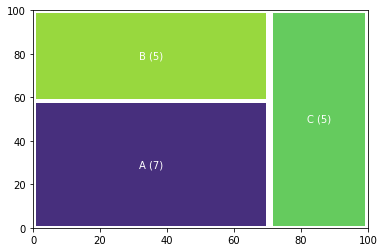

In [23]:
#Default Settings
random.seed(1)
norms = squarify.normalize_sizes(prep_df['count'].to_list(),  dx=3, dy=3)
squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), alpha=1, pad=True)
plt.show()

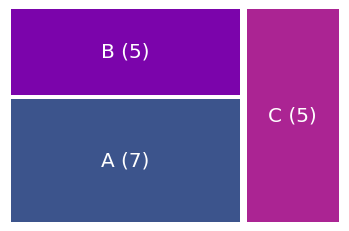

In [7]:
#Customized text size, text color, rectangle color through rcParams
#Removed axis for visual appeal
color = 'white'
mpl.rcParams['text.color'] = color
mpl.rcParams['font.size'] = 20
some_colors = ['#3c548c', '#7b04ab', '#ab2493']

squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), 
              color=some_colors,
              alpha=1, pad=True)
plt.axis('off')
plt.show()

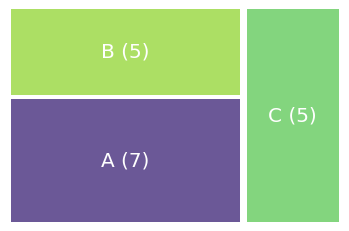

In [8]:
#For Lazy Code, Randomly Generated Colors
random.seed(1)

cmap = mpl.cm.get_cmap()

squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), alpha=0.8, pad=True, 
              color=[cmap(random.random()) for i in range(len(counts))])
plt.axis('off')
plt.show()

Breaking Down the Matplotlib Colormap!

In [9]:
list_bet_0_and_1 = [i for i in np.arange(0, 1, 1/len(counts))]
list_bet_0_and_1

[0.0, 0.3333333333333333, 0.6666666666666666]

In [10]:
cmap = mpl.cm.get_cmap('plasma')
mapped_list = [cmap(i) for i in np.arange(0, 1, 1/len(counts))]
mapped_list

[(0.050383, 0.029803, 0.527975, 1.0),
 (0.610667, 0.090204, 0.619951, 1.0),
 (0.928329, 0.472975, 0.326067, 1.0)]

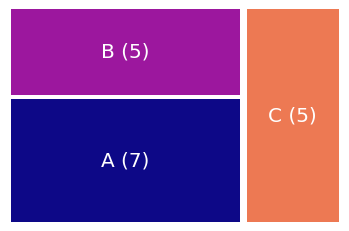

In [11]:
squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), 
              alpha=1, pad=True, 
              color=mapped_list)
plt.axis('off')
plt.show()

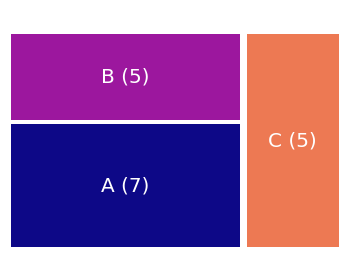

In [12]:
#troubleshooting title
mpl.rcParams['text.color'] = 'white'

squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), 
              alpha=1, pad=True, 
              color=mapped_list)
plt.title("this won't show (white)")
plt.axis('off')
plt.show()

rcParams control the the text color for the color of the text in the boxes as well as the title text. Both are white. However, adding the title to the plot automatically creates a placeholder, so I will call the plt.title() method anyway to quickly shift spacing.
To add a title, we are going to add another text box.

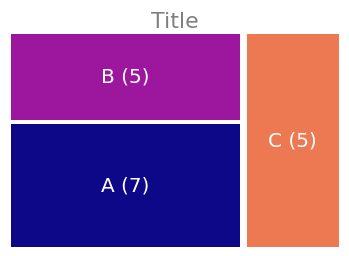

In [13]:
#add title
mpl.rcParams['text.color'] = 'white'

squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), 
              alpha=1, pad=True, 
              color=mapped_list)
plt.title("this won't show (white)")
plt.axis('off')

#adding text box inside plot
plt.text(50, 100,                     #sets position to place text using data coordinates
         'Title',                     #title string
         fontsize = 22, 
         color='grey', 
         horizontalalignment='center',#within the text box, aligns horizontally
         verticalalignment='bottom',  #within the text box, aligns towards top? I have no explanation for why syntax seems backward.
         zorder = 20)                 #Set drawing order to make sure text box is drawn on top of the existing title. I chose arbitrary value. You may need to increase.
plt.show()

In [14]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

## Composite Treemaps

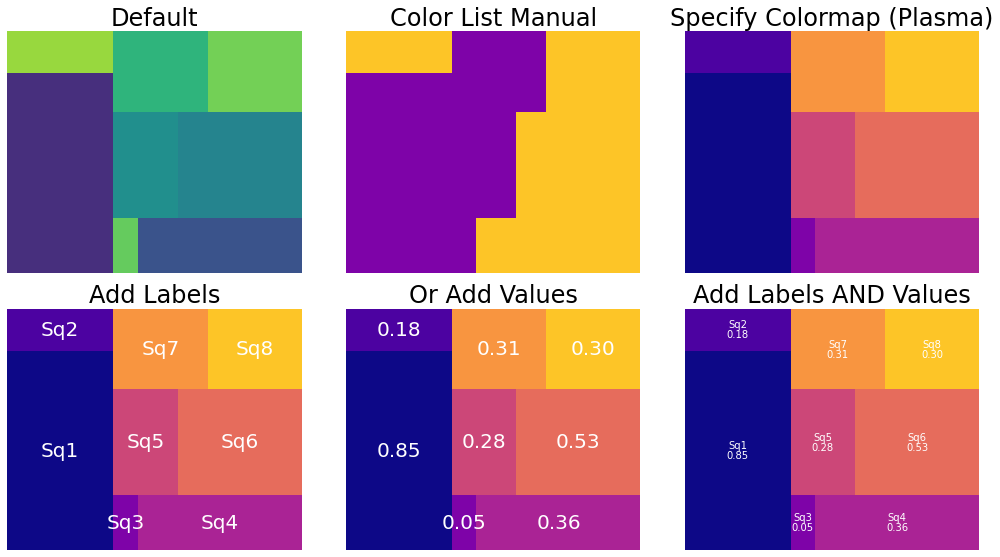

In [15]:
#Altered a GitHub Gist by sinhrks: https://gist.github.com/sinhrks/9579355

mpl.rcParams['text.color'] = 'black'
mpl.rcParams['font.size'] = '20'
random.seed(1)
np.random.seed(15)

sq = 8 #8 rectangles used
x = rand(sq)
labels = ['Sq{0}'.format(i+1) for i in range(sq)]

#colors from mpl Colormap: 'plasma'
cmap = mpl.cm.get_cmap('plasma')
mapped_list_8 = [cmap(i) for i in np.arange(0, 1, 1/len(x))]

fig, axes = plt.subplots(2, 3, figsize=(15, 8)) #makes a 2 row [0,1] by 3 column [0,1,2] grid
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95)

axes[0, 0].set_title('Default')                   #plot at position: row 0, column 0
squarify.plot(x, ax=axes[0, 0])

axes[0, 1].set_title('Color List Manual') #plot at position: row 0, column 1
squarify.plot(x, color=['#7e03a8', '#fdc527'], ax=axes[0, 1]) #Colors repeat when len(color list) < len(n_rectangles)

axes[0, 2].set_title('Specify Colormap (Plasma)') #plot at position: row 0, column 2
squarify.plot(x, color=mapped_list_8, ax=axes[0, 2])#use colormap similiarly to before

axes[1, 0].set_title('Add Labels')              #plot at position: row 1, column 0
mpl.rcParams['text.color'] = 'white'
squarify.plot(x, color=mapped_list_8, label=labels, ax=axes[1, 0])

values = ['{0:0.2f}'.format(s) for s in x]
mpl.rcParams['text.color'] = 'black'
axes[1, 1].set_title('Or Add Values')          #plot at position: row 1, column 1
mpl.rcParams['text.color'] = 'white'
squarify.plot(x, color=mapped_list_8, value=values, ax=axes[1, 1])

axes[1, 2].set_title('Add Labels AND Values') #plot at position: row 1, column 2
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['font.size'] = '10'                  #change label font size for this plot
mpl.rcParams['text.color'] = 'white'
squarify.plot(x, color=mapped_list_8, label=labels, value=values, ax=axes[1, 2])

axes[0, 0].axis('off')                            #turn pesky axes off
axes[0, 1].axis('off')                            #best in a for loop but show explicitly for clarity
axes[0, 2].axis('off')
axes[1, 0].axis('off')
axes[1, 1].axis('off')
axes[1, 2].axis('off')

plt.subplots_adjust(wspace=0.15, hspace=0.15)     #adjust spacing between plots
plt.show()

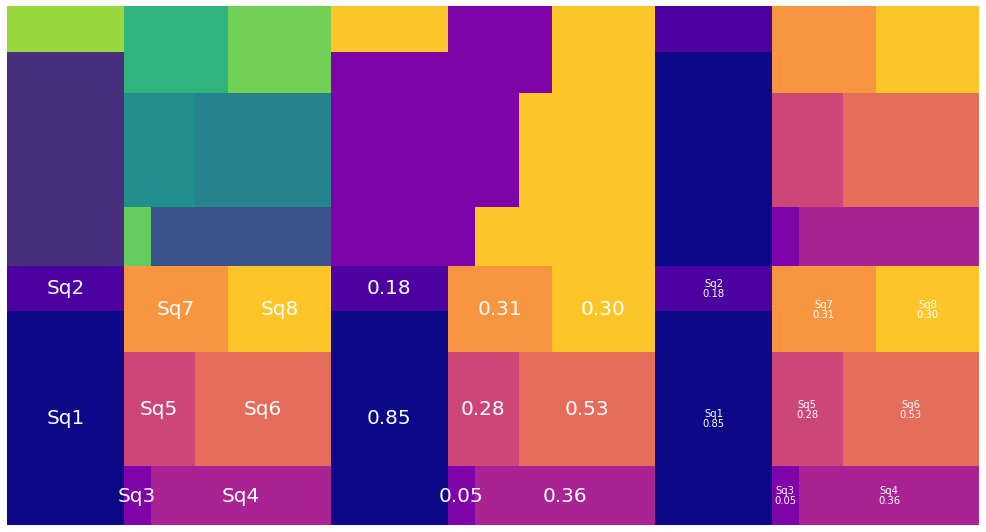

In [16]:
mpl.rcParams['text.color'] = 'white'
mpl.rcParams['font.size'] = '20'
random.seed(1)
np.random.seed(15)


cmap = mpl.cm.get_cmap('plasma')
mapped_list_8 = [cmap(i) for i in np.arange(0, 1, 1/len(x))]

fig, axes = plt.subplots(2, 3, figsize=(15, 8)) #makes a 2 row [0,1] by 3 column [0,1,2] grid
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95)

squarify.plot(x, ax=axes[0, 0])

squarify.plot(x, color=['#7e03a8', '#fdc527'], ax=axes[0, 1])

squarify.plot(x, color=mapped_list_8, ax=axes[0, 2])

squarify.plot(x, color=mapped_list_8, label=labels, ax=axes[1, 0])

squarify.plot(x, color=mapped_list_8, value=values, ax=axes[1, 1])

mpl.rcParams['font.size'] = '10'                  
squarify.plot(x, color=mapped_list_8, label=labels, value=values, ax=axes[1, 2])

axes[0, 0].axis('off')                            
axes[0, 1].axis('off')                            
axes[0, 2].axis('off')
axes[1, 0].axis('off')
axes[1, 1].axis('off')
axes[1, 2].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)     #adjust spacing between plots
plt.show()

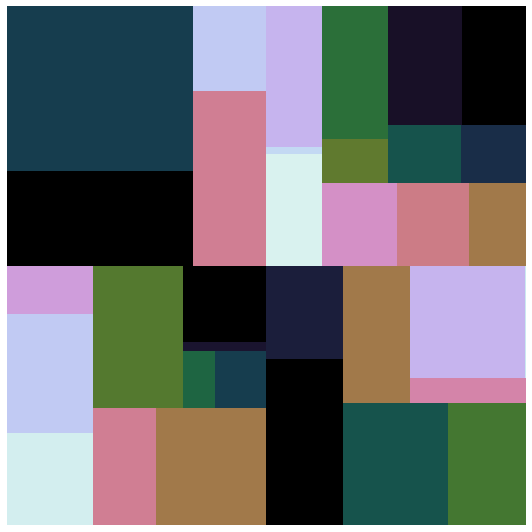

In [17]:
#use seaborn color map
#reverse colormap order

#cmap = mpl.cm.get_cmap('icefire')
cmap = sns.color_palette("cubehelix", as_cmap=True)
mapped_list_5 = [cmap(i) for i in np.arange(0, 1, 1/len(x))]

fig, axes = plt.subplots(2, 2, figsize=(8, 8)) 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95)

np.random.seed(1)
sq = 5
squarify.plot(rand(sq), color=[cmap(i) for i in np.arange(0, 1, 1/len(rand(sq)))], ax=axes[0, 0])

np.random.seed(2)
sq = 12
#squarify.plot(rand(sq), color=[cmap(i) for i in np.arange(0, 1, 1/len(rand(sq)))], ax=axes[0, 1])
squarify.plot(rand(sq), color=[cmap(i) for i in np.flip(np.arange(0, 1, 1/len(rand(sq))))], ax=axes[0, 1])

np.random.seed(3)
sq = 10
#squarify.plot(rand(sq), color=[cmap(i) for i in np.arange(0, 1, 1/len(rand(sq)))], ax=axes[1, 0])
squarify.plot(rand(sq), color=[cmap(i) for i in np.flip(np.arange(0, 1, 1/len(rand(sq))))], ax=axes[1, 0])

np.random.seed(4)
sq = 8
squarify.plot(rand(sq), color=[cmap(i) for i in np.arange(0, 1, 1/len(rand(sq)))], ax=axes[1, 1])

axes[0, 0].axis('off')                            
axes[0, 1].axis('off')                            
axes[1, 0].axis('off')
axes[1, 1].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)     #adjust spacing between plots
plt.show()